<a href="https://colab.research.google.com/github/leli1l/PengolahanCitraDigital/blob/main/LeliListiyana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUGAS MK Pengolahan & Analisis Citra Digital

memanggil drive

In [1]:
from google.colab import drive
drive.mount('/content/drives/')


Mounted at /content/drives/


baca file image

In [4]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drives/MyDrive/pratikum citra digital/daun_sirih.jpg', cv2.IMREAD_UNCHANGED)

memanggil gambar

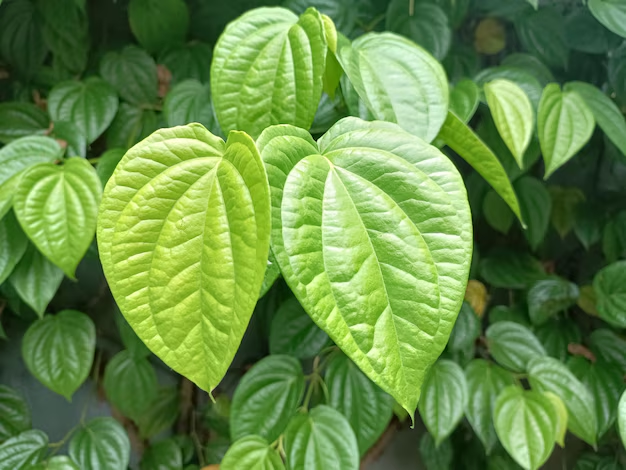

In [5]:
cv2_imshow(img)

cetak ukuran gambar

In [6]:
print (img.shape)

(470, 626, 3)


tampilkan gambar beserta ukuran meggunakan matplotlib. Matplotlib adalah sebuah library Python yang digunakan untuk membuat berbagai macam visualisasi data, mulai dari grafik sederhana hingga visualisasi yang lebih kompleks.
Penjelasan Singkat matplotlib

Fungsi utama → menampilkan data dalam bentuk grafik 2D (line chart, bar chart, scatter plot, histogram, pie chart, dll).

Modul populer → matplotlib.pyplot yang menyediakan fungsi mirip dengan MATLAB (misalnya plt.plot(), plt.imshow(), plt.bar()).

Integrasi → sering digunakan bersama library lain seperti NumPy, Pandas, dan OpenCV untuk analisis data, machine learning, dan pengolahan citra.

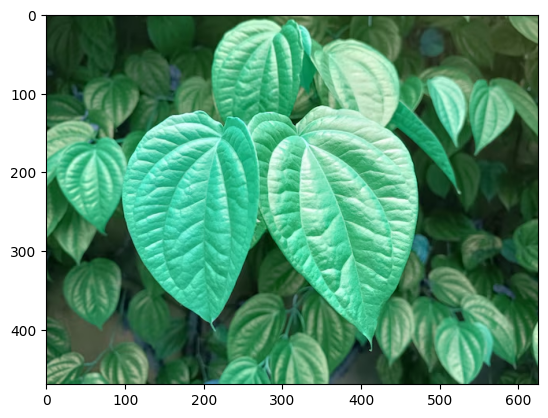

In [7]:
import matplotlib.pyplot as plt
plt.imshow(img)

grayscale : Mengurangi informasi warna menjadi hanya intensitas cahaya.

Fungsi Utama → Mengubah gambar berwarna menjadi gambar yang hanya memiliki satu saluran warna (intensitas cahaya). Ini sering menjadi langkah awal dalam banyak operasi pengolahan citra karena mengurangi kompleksitas data dan mempercepat pemrosesan.

Modul Populer → Di OpenCV, fungsi utamanya adalah cv2.cvtColor().

Integrasi → Gambar grayscale sering digunakan sebagai input untuk operasi selanjutnya seperti deteksi tepi, thresholding, atau analisis tekstur.

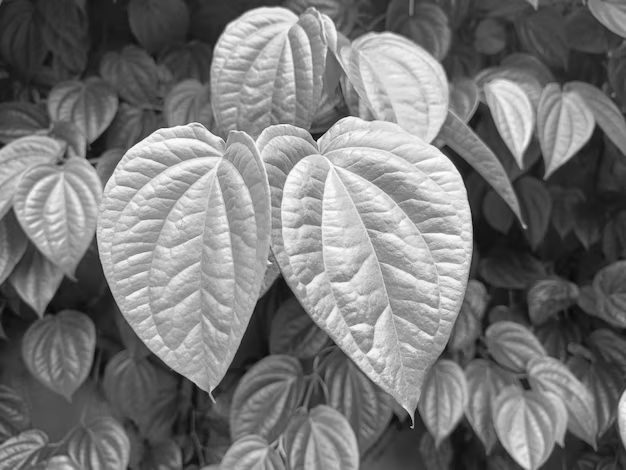

In [8]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

Gaussian Blur

Fungsi Utama: Menghaluskan gambar dan mengurangi noise (bintik-bintik yang tidak diinginkan) dengan merata-ratakan nilai piksel di sekitar setiap piksel, dengan bobot yang lebih besar diberikan pada piksel yang lebih dekat (mengikuti distribusi Gaussian).

Modul Populer: Di OpenCV, fungsi utamanya adalah cv2.GaussianBlur().

Integrasi: Gaussian blur sering digunakan sebelum operasi deteksi tepi atau segmentasi untuk mengurangi noise yang dapat menghasilkan tepi palsu.

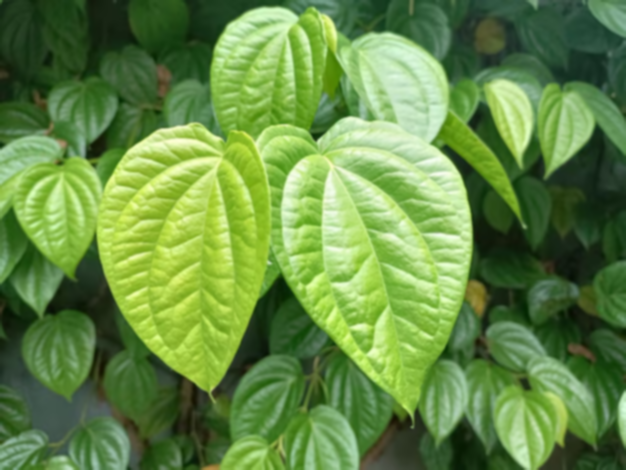

In [11]:
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)
cv2_imshow(blurred_img)

Deteksi Tepi (Edge Detection) disini menerapkan canny

Fungsi Utama: Mengidentifikasi batas-batas atau kontur objek dalam gambar dengan menemukan area di mana intensitas piksel berubah secara signifikan. Ini penting untuk mengenali bentuk objek.

Modul Populer: Di OpenCV, metode yang populer adalah cv2.Canny(), cv2.Sobel(), dan cv2.Laplacian().

Integrasi: Hasil deteksi tepi sering digunakan dalam pengenalan objek, segmentasi, dan analisis bentuk.

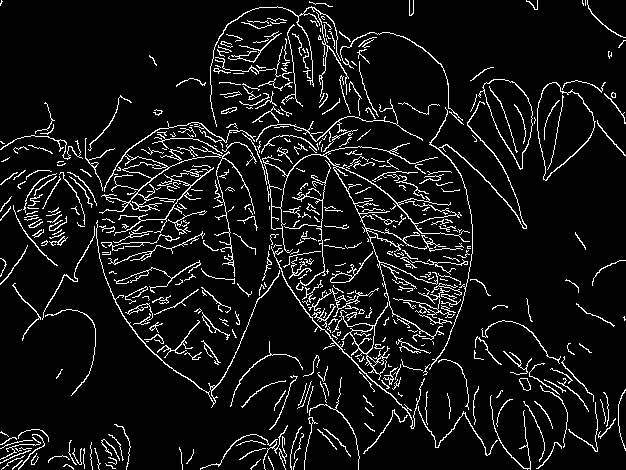

In [10]:
edges = cv2.Canny(gray_img, 100, 200) # Menggunakan gambar grayscale untuk deteksi tepi
cv2_imshow(edges)

Thresholding

Fungsi Utama: Mengubah gambar grayscale menjadi gambar biner (hitam dan putih) berdasarkan nilai ambang batas (threshold). Piksel dengan nilai di atas ambang batas menjadi putih, dan di bawah ambang batas menjadi hitam (atau sebaliknya).

Modul Populer: Di OpenCV, fungsi utamanya adalah cv2.threshold(). Ada juga metode thresholding adaptif seperti cv2.adaptiveThreshold() yang menyesuaikan ambang batas secara lokal.

Integrasi: Thresholding sering digunakan untuk memisahkan objek dari latar belakang, terutama pada gambar dengan kontras yang baik. Hasilnya dapat digunakan untuk analisis bentuk atau morfologi.

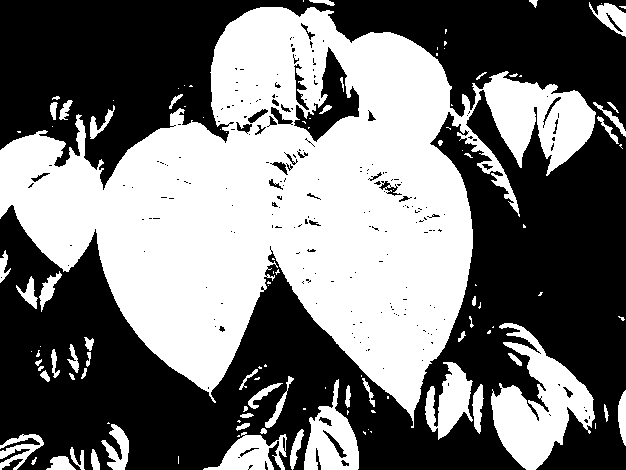

In [13]:
# Terapkan thresholding pada gambar grayscale
# Retval adalah nilai threshold yang digunakan (di sini 127)
# thresholded_img adalah gambar hasil thresholding
retval, thresholded_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(thresholded_img)

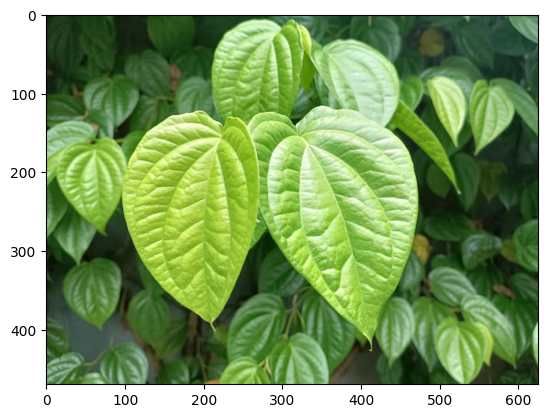

In [15]:
import numpy as np

gbr=cv2.imread('/content/drives/MyDrive/pratikum citra digital/daun_sirih.jpg')
# konversi gmbar bgr openCV ke rgb matplotlib
gbr_bgr=cv2.cvtColor(gbr,cv2.COLOR_BGR2RGB)
# tampilkan gbr_bgr
plt.imshow(gbr_bgr)
plt.show()

Kode ini melakukan beberapa hal:

import numpy as np: Mengimpor library NumPy, yang sering digunakan untuk operasi numerik, termasuk pada array gambar.

gbr=cv2.imread('/content/drives/MyDrive/pratikum citra digital/daun_sirih.jpg'): Membaca gambar dari lokasi yang ditentukan menggunakan OpenCV (cv2.imread). Gambar dibaca dalam format BGR (Biru, Hijau, Merah) secara default oleh OpenCV.

gbr_bgr=cv2.cvtColor(gbr,cv2.COLOR_BGR2RGB): Mengubah urutan saluran warna dari BGR (format OpenCV) menjadi RGB (format yang biasa digunakan oleh Matplotlib). Ini penting agar warna gambar ditampilkan dengan benar saat menggunakan Matplotlib.

plt.imshow(gbr_bgr): Menampilkan gambar yang sudah diubah ke format RGB menggunakan fungsi imshow() dari Matplotlib (plt).

plt.show(): Menampilkan plot atau gambar yang sudah disiapkan oleh Matplotlib.

Jadi, sel ini pada dasarnya membaca gambar menggunakan OpenCV, mengubah format warnanya agar sesuai dengan Matplotlib, dan kemudian menampilkannya menggunakan Matplotlib.

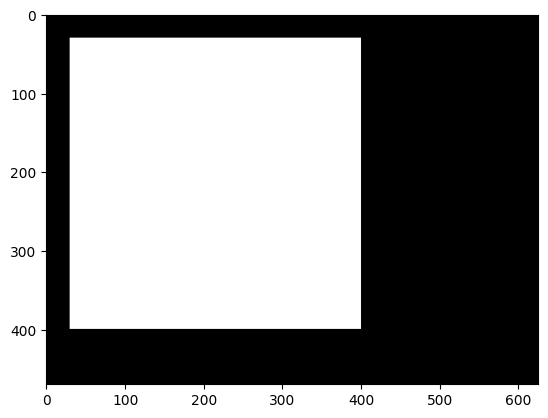

In [16]:
# buat mask
mask=np.zeros(gbr.shape[:2], np.uint8)
mask[30:400, 30:400] = 255
# tampilkan mask
plt.imshow(mask,'gray')
plt.show()



mask=np.zeros(gbr.shape[:2], np.uint8): Baris ini membuat sebuah array NumPy baru yang ukurannya sama dengan tinggi dan lebar gambar asli (gbr.shape[:2]). Semua nilai piksel dalam array ini diinisialisasi menjadi 0. np.uint8 menentukan tipe data pikselnya (unsigned integer 8-bit, umum untuk gambar). Array ini akan berfungsi sebagai mask.

mask[30:400, 30:400] = 255: Baris ini memilih sebagian area dari mask (dari baris 30 hingga 399, dan kolom 30 hingga 399) dan mengatur semua nilai piksel di area tersebut menjadi 255. Dalam mask biner, nilai 255 biasanya mewakili area yang "aktif" atau "terpilih", sedangkan nilai 0 mewakili area yang "tidak aktif" atau "diabaikan". Ini menciptakan sebuah persegi panjang putih di dalam mask hitam.

plt.imshow(mask,'gray'): Baris ini menampilkan mask menggunakan Matplotlib. Argumen 'gray' memastikan bahwa mask ditampilkan dalam skala abu-abu, di mana 0 adalah hitam dan 255 adalah putih.

plt.show(): Menampilkan plot mask yang sudah disiapkan.
Jadi, sel ini membuat sebuah mask berbentuk persegi panjang putih di atas latar belakang hitam, yang kemudian bisa digunakan untuk memilih atau memproses hanya bagian tertentu dari gambar asli.

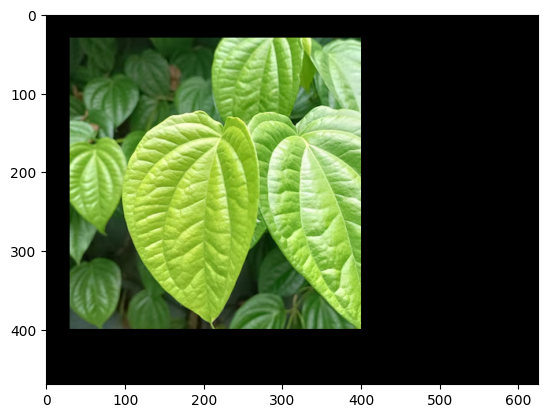

In [17]:
# gabungkan gambar dan mask
mask_gbr=cv2.bitwise_and(gbr_bgr, gbr_bgr, mask = mask)
# tampilkan mask_gbr
plt.imshow(mask_gbr)
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

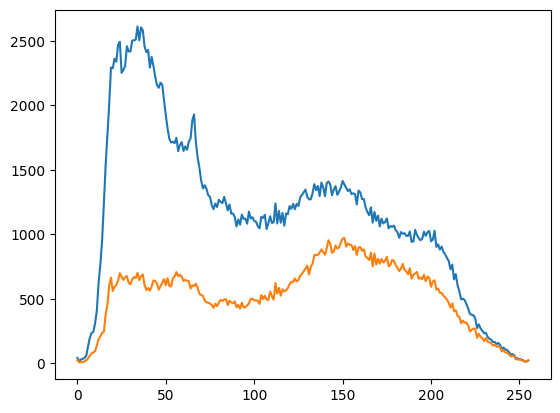

In [21]:
# lakukan perhitungan histogram untuk gambar dan masuk
hist_bgr=cv2.calcHist([gbr_bgr],[0],None,[256],[0,256])
hist_mask=cv2.calcHist([gbr_bgr],[0], mask, [256],[0,256])

# Tampilkan grafik histogram gambar dan masuk
plt.plot(hist_bgr)
plt.plot(hist_mask)
plt.show

Mask Histogram

Histogram sebagai grafik atau plot, yang memberi gambaran keseluruhan tentang distribusi intensitas gambar. Plot bernilai pixel (mulai dari 0 hingga 255, tidak selalu) dalam sumbu X dan jumlah piksel yang sesuai pada gambar pada sumbu Y.

PLOTING HISTOGRAM DENGAN MATPLOTLIB plt.hist(img_vec, bins = 256, color, alpha) img_vec: vektor image yang akan di buat grafik, img.ravel() perintah memberi vektor berisi semua piksel gambar yang tersusun

color: Ini adalah warna yang ingin gunakan untuk merencanakan histogram. Secara default, ini berwarna biru tua. Anda dapat menentukannya sebagai Merah, Biru, Hijau, Kuning, agenta, atau warna standar lainnya.

bins: Ini adalah jumlah batang yang ingin kami tampilkan pada sumbu X. Kita tahu bahwa intensitas piksel berkisar dari 0 hingga 255, dan jika kita ingin memvisualisasikan secara terpisah jumlah piksel untuk setiap intensitas yang mungkin, kita memerlukan grafik yang menunjukkan interval 0-255 sebagai 256 batang terpisah. Oleh karena itu, kita akan menyimpan bins = 256. Jika Anda tidak menentukan bins, Python akan memperlakukannya sebagai 10 secara default (dalam contoh berikut, kita akan melihat artinya).

alpha: Ini adalah tingkat transparansi yang ingin Anda gambar histogram.